# **Importing important libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# %matplotlib inline

import os

import warnings
warnings.filterwarnings('ignore')

# **Getting dataset and splitting into train and test**

In [4]:
from google.colab import files
import io
from sklearn.preprocessing import LabelEncoder
import csv 
from sklearn.model_selection import train_test_split

# Importing csv dataset file from local machine using below function
uploaded = files.upload()

data = pd.read_csv(io.BytesIO(uploaded['dataset.csv']))
X = data.drop('Cath',axis=1)
y = data.Cath

col=list(X.columns)
X[col] = X[col].apply(LabelEncoder().fit_transform)
# for row in csv_reader:
#   X[row]=Le.fit_transform(X[row])
y = LabelEncoder().fit_transform(y)
X_train, X_test, Y_train, Y_test = train_test_split(X, y,test_size=0.2,random_state=0)
print(X)
print(y)

Saving dataset.csv to dataset (2).csv
     Age  Weight  Length  Sex  BMI  DM  HTN  Current Smoker  EX-Smoker  FH  \
0     16      40      31    1  186   0    1               1          0   0   
1     30      20      13    0  161   0    1               0          0   0   
2     17       4      20    1   10   0    0               1          0   0   
3     29      17      14    0  129   0    1               0          0   0   
4     13      37       9    0  257   0    1               0          0   0   
..   ...     ...     ...  ...  ...  ..  ...             ...        ...  ..   
298   21      34      24    1  193   0    0               0          0   0   
299   18      14       8    0  147   0    0               0          0   0   
300   11      27      16    0  196   0    1               0          0   1   
301   20      40      15    0  252   1    0               0          0   0   
302   19      35      26    0  189   0    1               1          0   0   

     ...  HB   K  Na  WBC

# **Importing library for accuracy measurement**

In [5]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc

# **Using SVM for classification**

The accuracy score achieved using 10-fold Linear SVM is: 85.46 %
14
42
2
3
The accuracy score achieved using Linear SVM is: 91.8 %
The specificity score achieved using Linear SVM is: 95.45 %
The sensitivity score achieved using Linear SVM is: 82.35 %


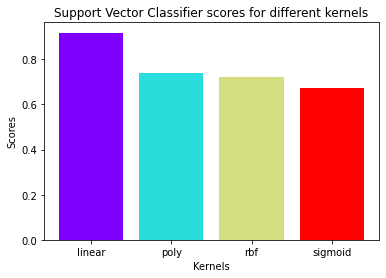

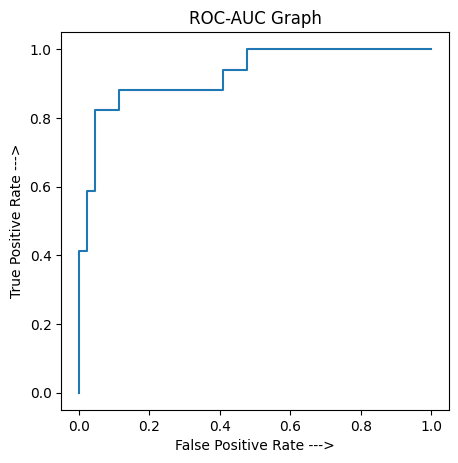

In [6]:
from sklearn import svm
from matplotlib import rcParams
from matplotlib.cm import rainbow

svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = svm.SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, Y_train)
    svc_scores.append(svc_classifier.score(X_test, Y_test))

colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
#for i in range(len(kernels)):
    #plt.text(i, svc_scores[i], round(svc_scores[i],2))
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')


sv = svm.SVC(kernel='linear',probability = True)


# Using 10 fold
#########################################################
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# # evaluate model
score_svm = cross_val_score(sv, X, y, scoring='accuracy', cv=cv)
print("The accuracy score achieved using 10-fold Linear SVM is: "+str(round((sum(score_svm)/len(score_svm))*100,2))+" %")
##########################################################


sv.fit(X_train, Y_train)
Y_pred_svm = sv.predict(X_test)

# score_svm = round(accuracy_score(Y_test,Y_pred_svm)*100,2)
# print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_svm).ravel()
print(tp)
print(tn)
print(fp)
print(fn)
accuracy_svm = round(((tp+tn)/(tn+fp+tp+fn))*100,2)
print("The accuracy score achieved using Linear SVM is: "+str(accuracy_svm)+" %")

specificity_svm = round((tn/(tn+fp))*100,2)
print("The specificity score achieved using Linear SVM is: "+str(specificity_svm)+" %")

sensitivity_svm = round((tp/(tp+fn))*100,2)
print("The sensitivity score achieved using Linear SVM is: "+str(sensitivity_svm)+" %")

Y_pred_svm_roc = sv.decision_function(X_test)
svm_fpr,svm_tpr,threshold = roc_curve(Y_test,Y_pred_svm_roc)
auc_svm = auc(svm_fpr,svm_tpr)
plt.figure(figsize = (5,5), dpi = 100)
plt.plot(svm_fpr,svm_tpr)
plt.xlabel("False Positive Rate --->")
plt.ylabel("True Positive Rate --->")
plt.title('ROC-AUC Graph')
plt.show()

# **Using K Nearest Neighbors for classification**

The accuracy score achieved using 10-fold KNN is: 71.28 %
1
44
0
16
The accuracy score achieved using KNN is: 73.77 %
The specificity score achieved using KNN is: 100.0 %
The sensitivity score achieved using KNN is: 5.88 %


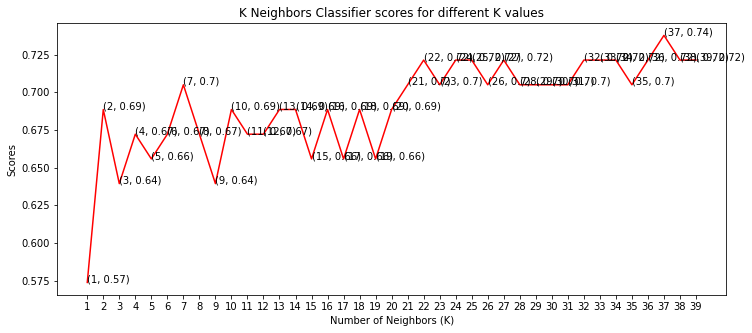

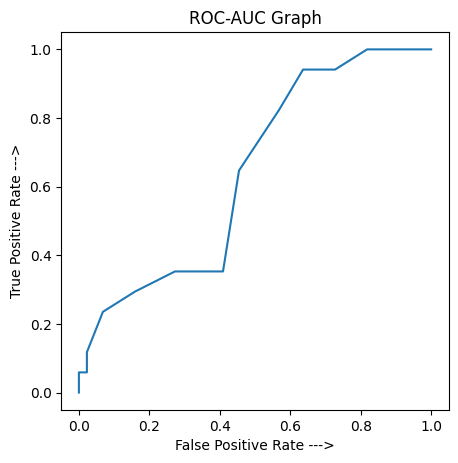

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_scores = []
for k in range(1,40):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, Y_train)
    knn_scores.append(knn_classifier.score(X_test, Y_test))
plt.figure(figsize=(12, 5))
plt.plot([k for k in range(1, 40)], knn_scores, color = 'red')
for i in range(1,40):
    plt.text(i, knn_scores[i-1], (i, round(knn_scores[i-1],2)))
plt.xticks([i for i in range(1, 40)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')


knn = KNeighborsClassifier(n_neighbors=37)


# Using 10 fold
#########################################################
cv = KFold(n_splits=10, random_state=42, shuffle=True)
# evaluate model
score_knn = cross_val_score(knn, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print("The accuracy score achieved using 10-fold KNN is: "+str(round((sum(score_knn)/len(score_knn))*100,2))+" %")
##########################################################




knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

# score_knn = round(accuracy_score(Y_test,Y_pred_knn)*100,2)
# print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_knn).ravel()

print(tp)
print(tn)
print(fp)
print(fn)
accuracy_knn = round(((tp+tn)/(tn+fp+tp+fn))*100,2)
print("The accuracy score achieved using KNN is: "+str(accuracy_knn)+" %")

specificity_knn = round((tn/(tn+fp))*100,2)
print("The specificity score achieved using KNN is: "+str(specificity_knn)+" %")

sensitivity_knn = round((tp/(tp+fn))*100,2)
print("The sensitivity score achieved using KNN is: "+str(sensitivity_knn)+" %")


Y_pred_knn_roc = knn.predict_proba(X_test)[:,1]
# df = pd.DataFrame(Y_pred_knn_roc)
# df.drop(df.columns[[1]], axis=1,inplace = True)
# Y_pred_svm_roc = Y_pred_svm_roc-1
knn_fpr,knn_tpr,threshold = roc_curve(Y_test,Y_pred_knn_roc)
auc_knn = auc(knn_fpr,knn_tpr)
plt.figure(figsize = (5,5), dpi = 100)
plt.plot(knn_fpr,knn_tpr)
plt.xlabel("False Positive Rate --->")
plt.ylabel("True Positive Rate --->")
plt.title('ROC-AUC Graph')
plt.show()

# **Using Decision Tree for classification**

The accuracy score achieved using 10-fold Decision Tree is: 76.92 %
15
41
3
2
The accuracy score achieved using Decision Tree is: 91.8 %
The specificity score achieved using Decision Tree is: 93.18 %
The sensitivity score achieved using Decision Tree is: 88.24 %


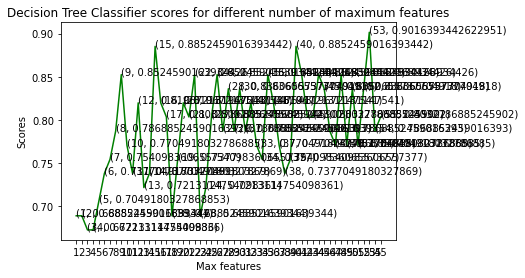

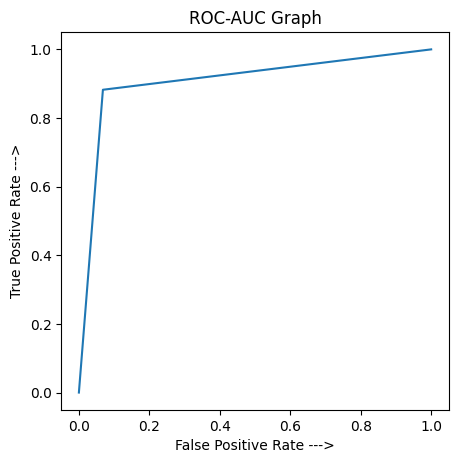

In [ ]:
from sklearn.tree import DecisionTreeClassifier



dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train, Y_train)
    dt_scores.append(dt_classifier.score(X_test, Y_test))

plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')



max_accuracy = 0


for x in range(100):
    dt = DecisionTreeClassifier(max_features=53,random_state=x,max_depth=19)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,5)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        

dt = DecisionTreeClassifier(max_features=53,random_state=best_x,max_depth=19)


# Using 10 fold
#########################################################
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
score_dt = cross_val_score(dt, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print("The accuracy score achieved using 10-fold Decision Tree is: "+str(round((sum(score_dt)/len(score_dt))*100,2))+" %")
##########################################################


dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

# score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
# print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_dt).ravel()

print(tp)
print(tn)
print(fp)
print(fn)
accuracy_dt = round(((tp+tn)/(tn+fp+tp+fn))*100,2)
print("The accuracy score achieved using Decision Tree is: "+str(accuracy_dt)+" %")

specificity_dt = round((tn/(tn+fp))*100,2)
print("The specificity score achieved using Decision Tree is: "+str(specificity_dt)+" %")

sensitivity_dt = round((tp/(tp+fn))*100,2)
print("The sensitivity score achieved using Decision Tree is: "+str(sensitivity_dt)+" %")

Y_pred_dt_roc = dt.predict_proba(X_test)[:,1]
# df = pd.DataFrame(Y_pred_knn_roc)
# df.drop(df.columns[[1]], axis=1,inplace = True)
# Y_pred_svm_roc = Y_pred_svm_roc-1
dt_fpr,dt_tpr,threshold = roc_curve(Y_test,Y_pred_dt_roc)
auc_dt = auc(dt_fpr,dt_tpr)
plt.figure(figsize = (5,5), dpi = 100)
plt.plot(dt_fpr,dt_tpr)
plt.xlabel("False Positive Rate --->")
plt.ylabel("True Positive Rate --->")
plt.title('ROC-AUC Graph')
plt.show()

# **Using Random Forest for classification**

The accuracy score achieved using 10-fold Random Forest is: 85.84 %
13
44
0
4
The accuracy score achieved using Random Forest is: 93.44 %
The specificity score achieved using Random Forest is: 100.0 %
The sensitivity score achieved using Random Forest is: 76.47 %


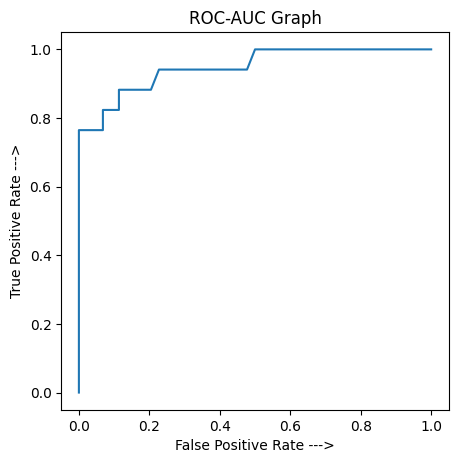

In [ ]:
from sklearn.ensemble import RandomForestClassifier




max_accuracy = 0


# for x in range(2000):
#     rf = RandomForestClassifier(random_state=x)
#     rf.fit(X_train,Y_train)
#     Y_pred_rf = rf.predict(X_test)
#     current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
#     if(current_accuracy>max_accuracy):
#         max_accuracy = current_accuracy
#         best_x = x
        
rf = RandomForestClassifier(random_state=1186,n_estimators=100)

#########################################################
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
score_rf = cross_val_score(rf, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print("The accuracy score achieved using 10-fold Random Forest is: "+str(round((sum(score_rf)/len(score_rf))*100,2))+" %")
##########################################################


rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

# score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
# print("The accuracy score achieved using Random forest is: "+str(score_rf)+" %")

tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_rf).ravel()

print(tp)
print(tn)
print(fp)
print(fn)
accuracy_rf = round(((tp+tn)/(tn+fp+tp+fn))*100,2)
print("The accuracy score achieved using Random Forest is: "+str(accuracy_rf)+" %")

specificity_rf = round((tn/(tn+fp))*100,2)
print("The specificity score achieved using Random Forest is: "+str(specificity_rf)+" %")

sensitivity_rf = round((tp/(tp+fn))*100,2)
print("The sensitivity score achieved using Random Forest is: "+str(sensitivity_rf)+" %")

Y_pred_rf_roc = rf.predict_proba(X_test)[:,1]
# df = pd.DataFrame(Y_pred_knn_roc)
# df.drop(df.columns[[1]], axis=1,inplace = True)
# Y_pred_svm_roc = Y_pred_svm_roc-1
rf_fpr,rf_tpr,threshold = roc_curve(Y_test,Y_pred_rf_roc)
auc_rf = auc(rf_fpr,rf_tpr)
plt.figure(figsize = (5,5), dpi = 100)
plt.plot(rf_fpr,rf_tpr)
plt.xlabel("False Positive Rate --->")
plt.ylabel("True Positive Rate --->")
plt.title('ROC-AUC Graph')
plt.show()

Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

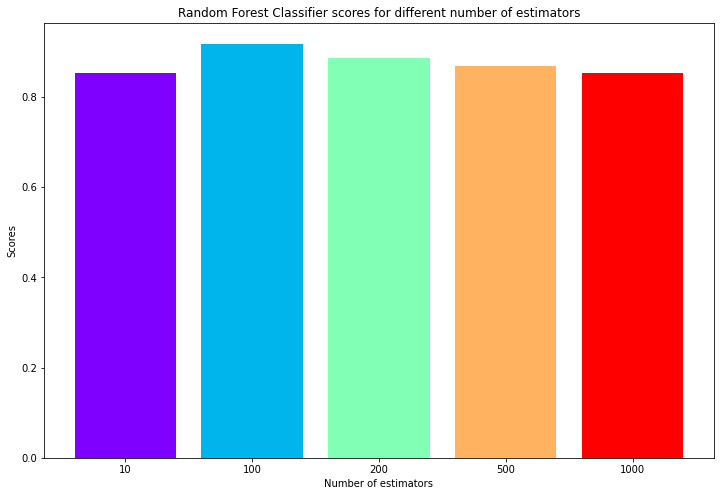

In [ ]:
rf_scores = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 42)
    rf_classifier.fit(X_train, Y_train)
    rf_scores.append(rf_classifier.score(X_test, Y_test))

colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.figure(figsize=(12, 8))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
# for i in range(len(estimators)):
#     plt.text(i, rf_scores[i], rf_scores[i])
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')

# **Using Naive Bayes for classification**

The accuracy score achieved using 10-fold Naive Bayes is: 52.43 %
15
19
25
2
The accuracy score achieved using Naive Bayes is: 55.74 %
The specificity score achieved using Naive Bayes is: 43.18 %
The sensitivity score achieved using Naive Bayes is: 88.24 %


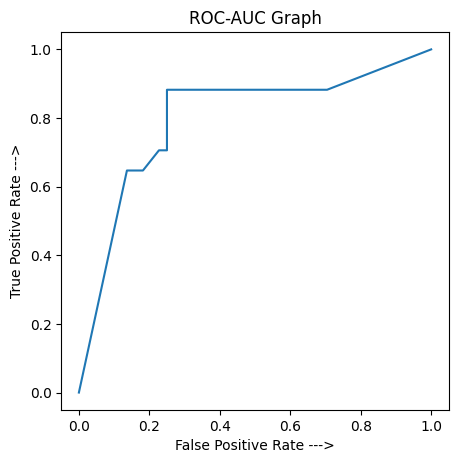

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
#########################################################
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
score_nb = cross_val_score(nb, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print("The accuracy score achieved using 10-fold Naive Bayes is: "+str(round((sum(score_nb)/len(score_nb))*100,2))+" %")
##########################################################
nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)
# score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)
# print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_nb).ravel()

print(tp)
print(tn)
print(fp)
print(fn)
accuracy_nb = round(((tp+tn)/(tn+fp+tp+fn))*100,2)
print("The accuracy score achieved using Naive Bayes is: "+str(accuracy_nb)+" %")

specificity_nb = round((tn/(tn+fp))*100,2)
print("The specificity score achieved using Naive Bayes is: "+str(specificity_nb)+" %")

sensitivity_nb = round((tp/(tp+fn))*100,2)
print("The sensitivity score achieved using Naive Bayes is: "+str(sensitivity_nb)+" %")

Y_pred_nb_roc = nb.predict_proba(X_test)[:,1]
nb_fpr,nb_tpr,threshold = roc_curve(Y_test,Y_pred_nb_roc)
auc_nb = auc(nb_fpr,nb_tpr)
plt.figure(figsize = (5,5), dpi = 100)
plt.plot(nb_fpr,nb_tpr)
plt.xlabel("False Positive Rate --->")
plt.ylabel("True Positive Rate --->")
plt.title('ROC-AUC Graph')
plt.show()

# **Using Logistic Regression for classification**

The accuracy score achieved using 10-fold Logistic Regression is: 83.85 %
11
41
3
6
The accuracy score achieved using Logistic Regression is: 85.25 %
The specificity score achieved using Logistic Regression is: 93.18 %
The sensitivity score achieved using Logistic Regression is: 64.71 %


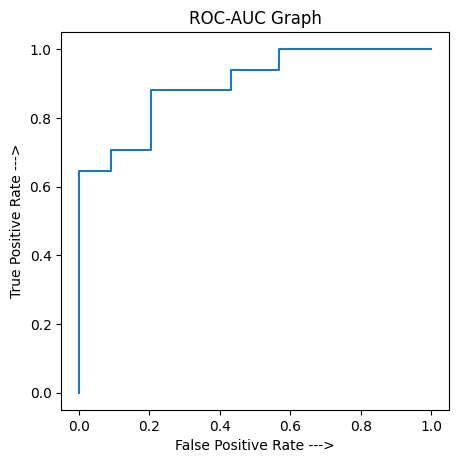

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
#########################################################
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
score_lr = cross_val_score(lr, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print("The accuracy score achieved using 10-fold Logistic Regression is: "+str(round((sum(score_lr)/len(score_lr))*100,2))+" %")
##########################################################
lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

# score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)
# print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_lr).ravel()

print(tp)
print(tn)
print(fp)
print(fn)
accuracy_lr = round(((tp+tn)/(tn+fp+tp+fn))*100,2)
print("The accuracy score achieved using Logistic Regression is: "+str(accuracy_lr)+" %")


specificity_lr = round((tn/(tn+fp))*100,2)
print("The specificity score achieved using Logistic Regression is: "+str(specificity_lr)+" %")

sensitivity_lr = round((tp/(tp+fn))*100,2)
print("The sensitivity score achieved using Logistic Regression is: "+str(sensitivity_lr)+" %")

Y_pred_lr_roc = lr.predict_proba(X_test)[:,1]
lr_fpr,lr_tpr,threshold = roc_curve(Y_test,Y_pred_lr_roc)
auc_lr = auc(lr_fpr,lr_tpr)
plt.figure(figsize = (5,5), dpi = 100)
plt.plot(lr_fpr,lr_tpr)
plt.xlabel("False Positive Rate --->")
plt.ylabel("True Positive Rate --->")
plt.title('ROC-AUC Graph')
plt.show()

# **XGBoost**

The accuracy score achieved using 10-fold XGBoost is: 85.82 %
11
40
4
6
The accuracy score achieved using XGBoost is: 83.61 %
The specificity score achieved using XGBoost is: 90.91 %
The sensitivity score achieved using XGBoost is: 64.71 %


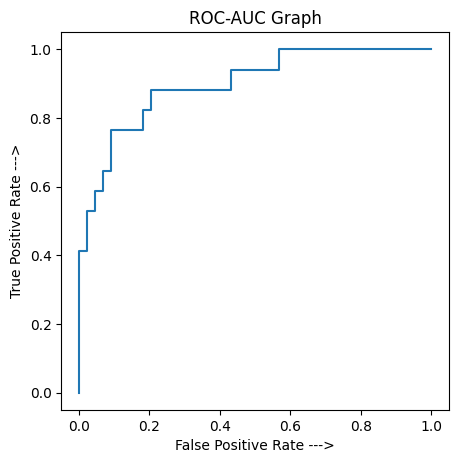

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)
# score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)
# print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")
#########################################################
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
score_lr = cross_val_score(xgb_model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print("The accuracy score achieved using 10-fold XGBoost is: "+str(round((sum(score_lr)/len(score_lr))*100,2))+" %")
##########################################################
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_xgb).ravel()

print(tp)
print(tn)
print(fp)
print(fn)
accuracy_xgb = round(((tp+tn)/(tn+fp+tp+fn))*100,2)
print("The accuracy score achieved using XGBoost is: "+str(accuracy_xgb)+" %")


specificity_xgb = round((tn/(tn+fp))*100,2)
print("The specificity score achieved using XGBoost is: "+str(specificity_xgb)+" %")

sensitivity_xgb = round((tp/(tp+fn))*100,2)
print("The sensitivity score achieved using XGBoost is: "+str(sensitivity_xgb)+" %")

Y_pred_xgb_roc = xgb_model.predict_proba(X_test)[:,1]
xgb_fpr,xgb_tpr,threshold = roc_curve(Y_test,Y_pred_xgb_roc)
auc_xgb = auc(xgb_fpr,xgb_tpr)
plt.figure(figsize = (5,5), dpi = 100)
plt.plot(xgb_fpr,xgb_tpr)
plt.xlabel("False Positive Rate --->")
plt.ylabel("True Positive Rate --->")
plt.title('ROC-AUC Graph')
plt.show()

#**Accuracy comparision graph**#

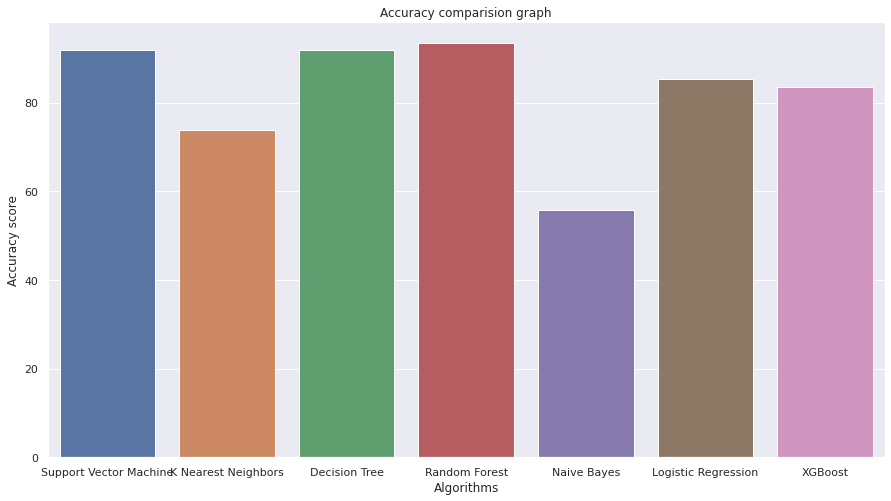

In [ ]:
accuracy = [accuracy_svm,accuracy_knn,accuracy_dt,accuracy_rf,accuracy_nb,accuracy_lr,accuracy_xgb]
algorithms = ["Support Vector Machine","K Nearest Neighbors","Decision Tree","Random Forest","Naive Bayes","Logistic Regression","XGBoost"]

sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
plt.title('Accuracy comparision graph')

sns.barplot(algorithms,accuracy)

# **Sensitivity comparison graph**

5.88


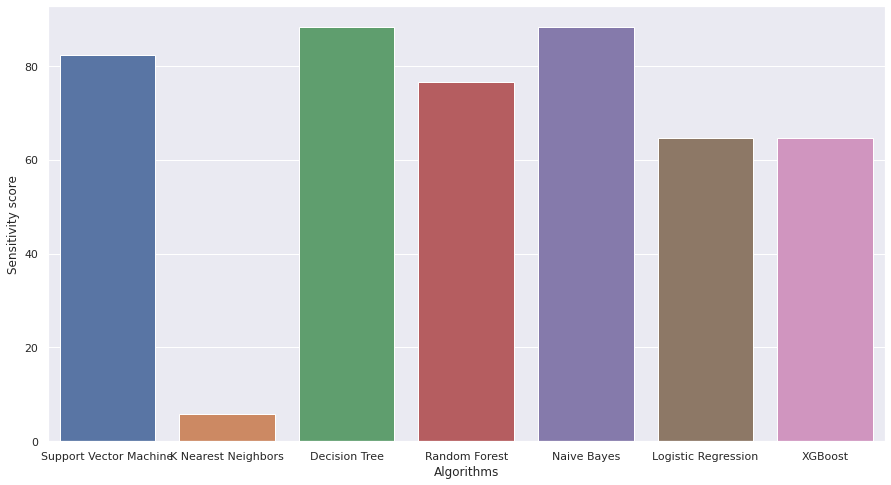

In [ ]:
sensitivity = [sensitivity_svm,sensitivity_knn,sensitivity_dt,sensitivity_rf,sensitivity_nb,sensitivity_lr,sensitivity_xgb]
algorithms = ["Support Vector Machine","K Nearest Neighbors","Decision Tree","Random Forest","Naive Bayes","Logistic Regression","XGBoost"]
print(sensitivity_knn)
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Sensitivity score")

sns.barplot(algorithms,sensitivity)

# **Specificity comparison graph**

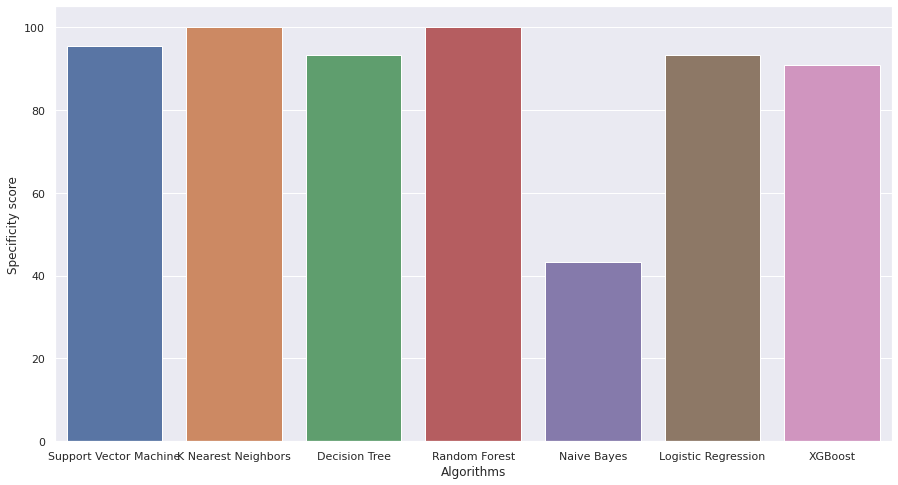

In [ ]:
specificity = [specificity_svm,specificity_knn,specificity_dt,specificity_rf,specificity_nb,specificity_lr,specificity_xgb]
algorithms = ["Support Vector Machine","K Nearest Neighbors","Decision Tree","Random Forest","Naive Bayes","Logistic Regression","XGBoost"]

sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Specificity score")

sns.barplot(algorithms,specificity)